In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import tree
import graphviz
from graphviz import Source
import seaborn as sn

df_wine = pd.read_csv('winequalityN.csv')

In [31]:
df_wine.head(20)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
# fill NaN values with mean values
for i in df_wine.columns:
    if df_wine[i].isnull().sum() > 0:
#         print(i)
        df_wine[i] = df_wine[i].fillna(df_wine[i].mean())

In [4]:
# df_wine.fillna(0.0,inplace=True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_wine.iloc[:,1:-1], df_wine['type'], test_size= 0.3,random_state =42)

In [6]:
# instantiate a decision tree model.
dt = DecisionTreeClassifier(criterion = 'gini',max_depth = 3, min_samples_leaf = 1, 
                                 min_samples_split = 2,max_features=6, random_state= 42) 
dt.fit(X_train, y_train) # train our model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=6, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [7]:
y_pred = dt.predict(X_test)
print(y_pred)
accuracy_score(y_test, y_pred)  

['white' 'white' 'white' ... 'red' 'white' 'red']


0.9492307692307692

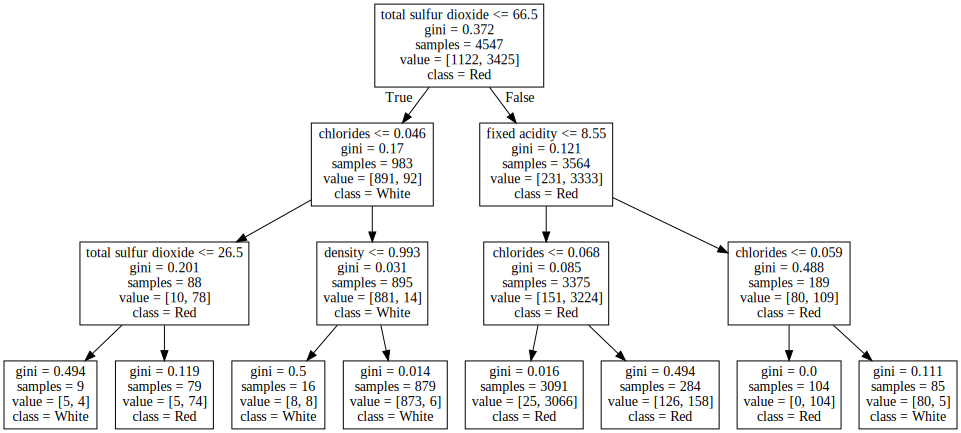

In [8]:
# show the decision tree model
Source(tree.export_graphviz(dt, out_file=None, class_names=['White', 'Red'], feature_names= X_test.columns))
# graphviz.render("dot", "png", "decision_tree_depth3.dot") 

In [9]:
print(dt.predict([[2,0.8,0.35,8.5,0.02,22,161,0.9,3.05,0.56,11.1]]))

['white']


In [10]:
y_test.tail()

4294    white
3757    white
5954      red
4418    white
6182      red
Name: type, dtype: object

In [11]:
#converting the numpy array to list
x=np.array(y_pred).tolist()

#printing first 10 predictions
print("The prediction:")
for i in range(0,10):
    print (x[i]) 
#printing first 10 expectations
print("\nThe expectation:")
print (y_test.head(10))

The prediction:
white
white
white
white
white
white
white
red
white
red

The expectation:
3103    white
1419    white
4761    white
4690    white
4032    white
1297    white
1773    white
5584      red
561     white
5946      red
Name: type, dtype: object


In [12]:
import time
start_time = time.time()
dt.fit(X_train,y_train)
end_time  = time.time()
print('duration:',end_time-start_time)

duration: 0.012134075164794922


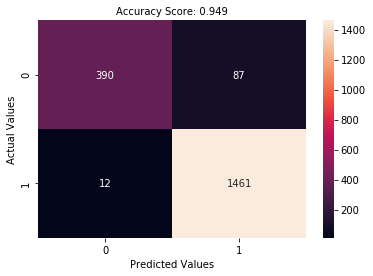

In [13]:
score = round(accuracy_score(y_test, y_pred), 3)

cm = confusion_matrix(y_test, y_pred)

sn.heatmap(cm, annot=True, fmt=".0f")
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Accuracy Score: {0}'.format(score), size = 10)
plt.show()

In [14]:
df_wine.shape

(6497, 13)

In [15]:
X_train.shape

(4547, 11)

In [16]:
X_test.shape

(1950, 11)

In [17]:
# X_train_scaled = preprocessing.scale(X_train)
# print(X_train_scaled)

In [18]:
#build a function for decision tree
# def decTreeScore2(crit = 'gini',   minSamples = 1, minSplit = 2,max_features = 2):
#     dect = DecisionTreeClassifier(criterion = crit, min_samples_leaf = minSamples, 
#                                  min_samples_split = minSplit, random_state= 42)
#     dect.fit(X_train, y_train)
#     accuracy = accuracy_score(y_test, dect.predict(X_test))
#     print(accuracy)
#     return accuracy

In [19]:
# decTreeScore2()

In [20]:
# decTreeScore2(crit = 'entropy')

In [21]:
# use different maximum depth of the tree
# for i in np.arange(1,5, 1):
#     decTreeScore2(maxDepth = i)

In [22]:
# for i in np.arange(1, 2, 1):
#     decTreeScore2(minSamples = i)

In [23]:
# for i in np.arange(2,3,1):
#     decTreeScore2(minSplit = i)

In [24]:
# for i in np.arange(1,3,1):
#     decTreeScore2(max_features = i)